# Visualization with Seaborn

## Introduction

### Agenda
By the end of this lab, you will be able to
+ Create plots using the seaborn library, specifically
    + histograms (`distplot`)
    + density / contour plots (`jointplot`)
    + dotplots, showing individual data points (`stripplot`)
    + boxplots, for showing interquartile ranges and outliers (`boxplot`, `violinplot`, `catplot`)
+ Use seaborn's plotting library to separate data in plots by "factor" or "categorical variable" (e.g. show different distributions for smokers and non-smokers)
+ Use `pairplot` to quickly assess which features are highly correlated

The cell below modifies the size of the standard input and output cells. This is to help see large graphs. It is also useful to turn off output scrolling. Go to **Cell &rightarrow; All Output &rightarrow; Toggle Scrolling** to turn scrolling off.

This worksheet uses the built-in `tips` dataset, which has contains features about a sample of diner's at a restaurant, and the amount they tipped their waiter for a meal.

## Motivation for visualization (Anscombe's Quartet)

Code from [here](https://matplotlib.org/gallery/specialty_plots/anscombe.html). You do **not** need to understand it all!

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


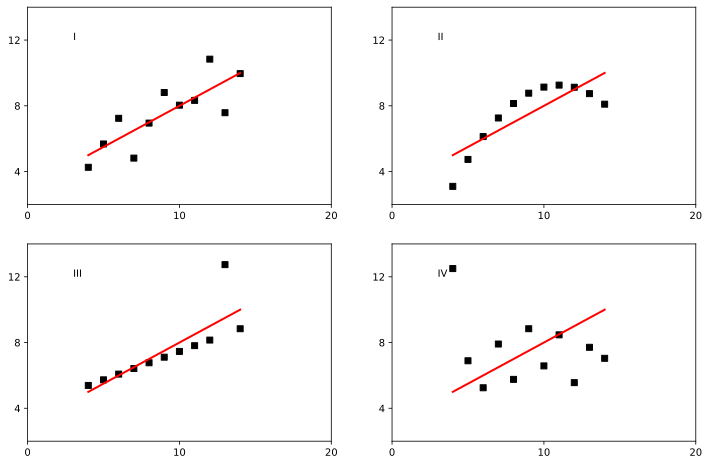

In [1]:
"""
Edward Tufte uses this example from Anscombe to show 4 datasets of x
and y that have the same mean, standard deviation, and regression
line, but which are qualitatively different.

matplotlib fun for a rainy day
"""

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Make graphics vector graphics -- less pixelation!
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (12.0, 8.0)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])


def fit(x):
    return 3 + 0.5 * x

def make_plot(plot_number, x, y, show_xticks=True, show_ytics=True):
    roman_numeral = {1: 'I', 2:'II', 3: 'III', 4: 'IV', 5: 'V', 6:'VI', 7: 'VII',
                     8: 'VIII', 9: 'IX'}
    xfit = np.array([np.min(x), np.max(x)])
    plt.subplot(plot_number)
    plt.plot(x, y, 'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2, 20, 2, 14])
    plt.setp(plt.gca(), yticks=(4,8,12), xticks=(0, 10, 20))
    plt.text(3, 12, roman_numeral[plot_number % 10])

make_plot(221, x, y1)
make_plot(222, x, y2)
make_plot(223, x, y3)
make_plot(224, x, y4)

# verify the stats
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

plt.show()

Key takeaway:
- Very different distribution of data
- Summary statistics (means, modes, standard deviation, and correlations) are the same

Summary statistics fail to capture nuance; we should always look at our data!

More on Anscombe's Quartet on [Wikipedia](https://en.wikipedia.org/wiki/Anscombe's_quartet). 

**Fun fact:** it is not known how Anscombe generated his data!

## Visualization with Seaborn

Seaborn is a visualization library that came out of Stanford. It contains all the standard visualizations you'd expect, along with some more advanced visualizations that can be created with very little code. 

This is in contrast to Matplotlib, which is much more customizable and extensible, but can require a lot of code to do even simple tasks.

In [2]:
import seaborn as sns

%matplotlib inline

## Get Data

In [3]:
import pandas as pd
import numpy as np
tips = pd.read_csv('data/tips.csv')

## Glance at the data:

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Basic Stats

Some stats to keep in mind when making the visualizations:

In [5]:
type(tips)

pandas.core.frame.DataFrame

In [6]:
# basic stats
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Visualize Data

#### `distplot`

`distplot` has a couple different ways of visualizing distributions:

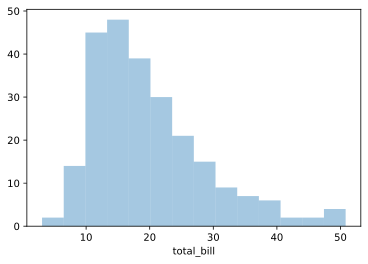

In [7]:
# Histogram
sns.distplot(tips.total_bill, hist=True, kde=False);

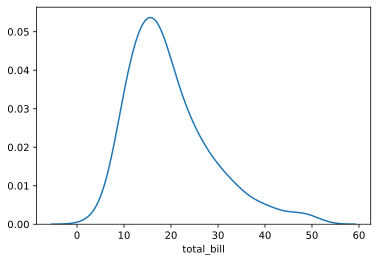

In [8]:
# KDE
sns.distplot(tips.total_bill, hist=False, kde=True);

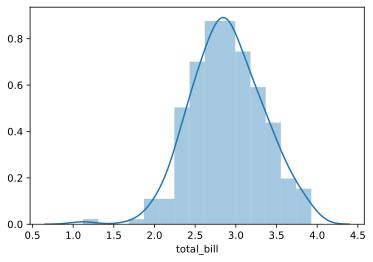

In [9]:
# Histo + KDE
sns.distplot(np.log(tips.total_bill), hist=True, kde=True);

#### `pairplot`

`pairplot` is a way of visualizing all the pairs of variables in your data against each other.

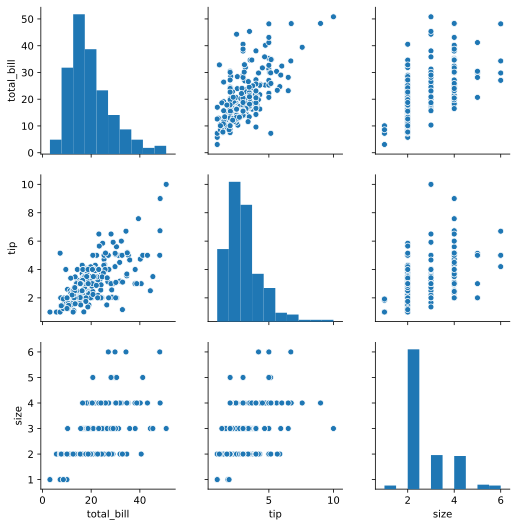

In [10]:
sns.pairplot(tips);

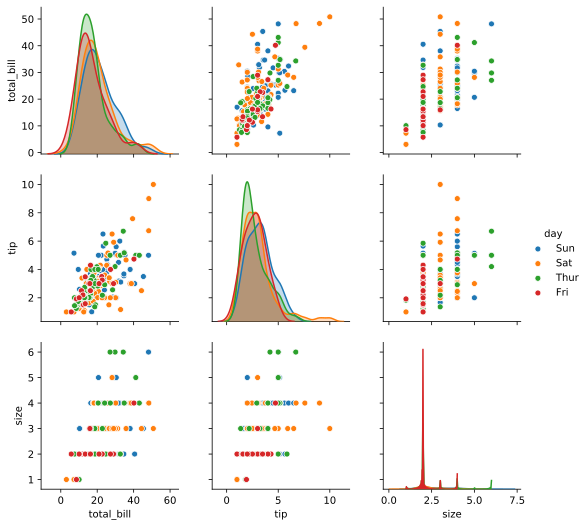

In [11]:
sns.pairplot(tips, hue='day');

#### `jointplot`

`jointplot` shows both a scatter plot of the points as well as histograms of the distributions on each axis.

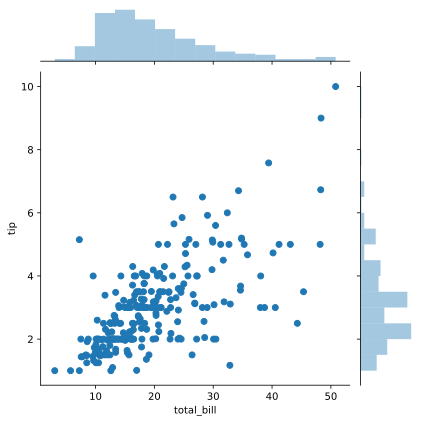

In [12]:
sns.jointplot(x="total_bill", y="tip", data=tips);

#### `hexplot`

Hexplot is a variant on `jointplot`, but instead shows where the _density_ of points are in the 2D space as opposed to the points themselves.

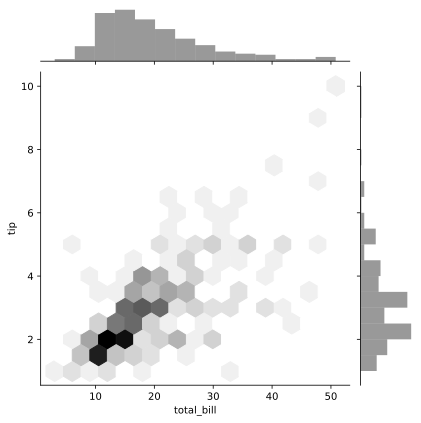

In [13]:
sns.jointplot(x='total_bill', y='tip', kind="hex", color="k", data=tips);

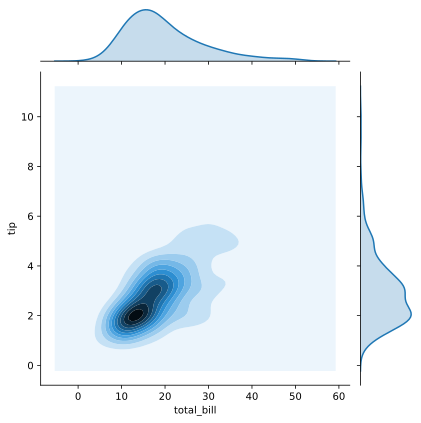

In [14]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde");

#### Categorical Scatterplot

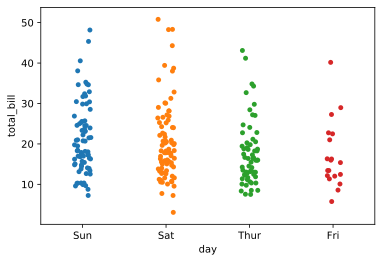

In [15]:
sns.stripplot(x="day", y="total_bill", data=tips);

#### `stripplot`

Seaborn has some nice ways of visualizing categorical vs. continuous data. The classic way to do this is using Box Plots (see below), but Seaborn has some nice additional functionality as well:

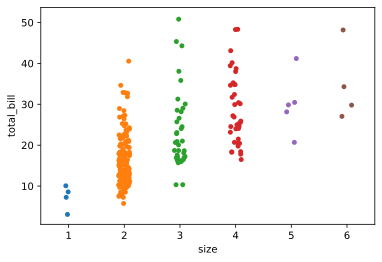

In [16]:
sns.stripplot(x="size", y="total_bill", data=tips, jitter=True);

#### `swarmplot`
Positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points

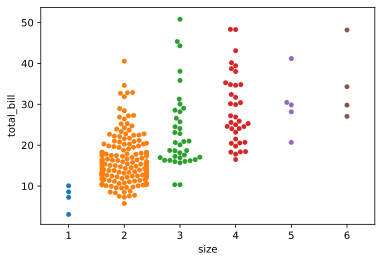

In [17]:
sns.swarmplot(x="size", y="total_bill", data=tips);

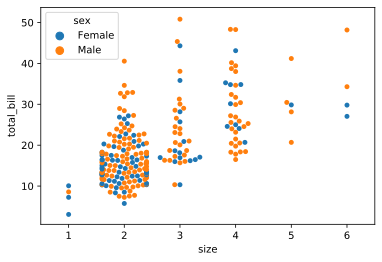

In [18]:
sns.swarmplot(x="size", y="total_bill", hue="sex", data=tips);

#### `boxplot`

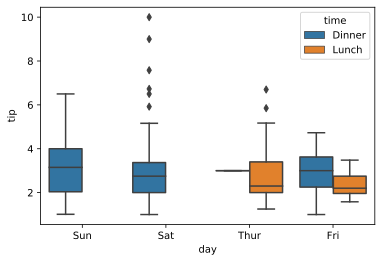

In [19]:
sns.boxplot(x="day", y="tip", hue="time", data=tips, dodge = True);

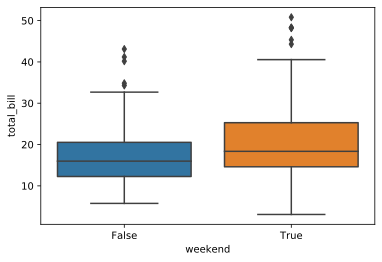

In [20]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.boxplot(x="weekend", y="total_bill", data=tips);

In [23]:
tips

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,True
241,22.67,2.00,Male,Yes,Sat,Dinner,2,True
242,17.82,1.75,Male,No,Sat,Dinner,2,True


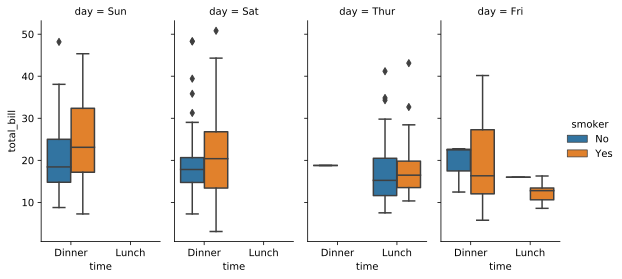

In [27]:
# Note: In older releases, this function was called "factorplot"
sns.catplot(x="time", y="total_bill", hue="smoker",
            col="day", data=tips, kind="box", height=4, aspect=.5);

#### Violin Plot

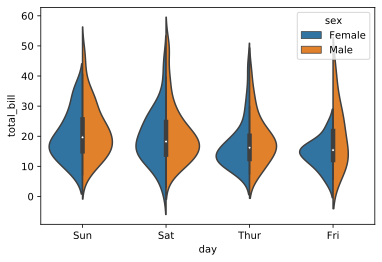

In [29]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex", split=True);